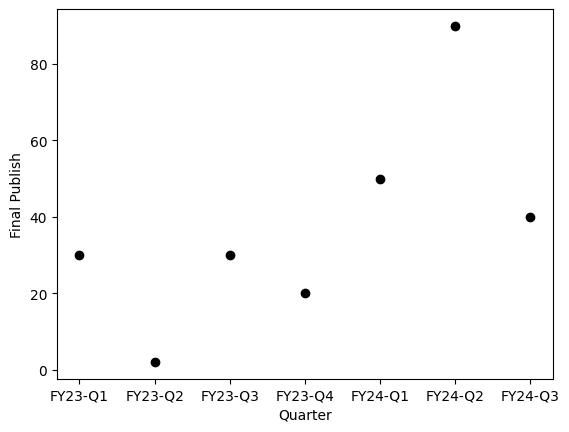

Fitting 3 folds for each of 100 candidates, totalling 300 fits


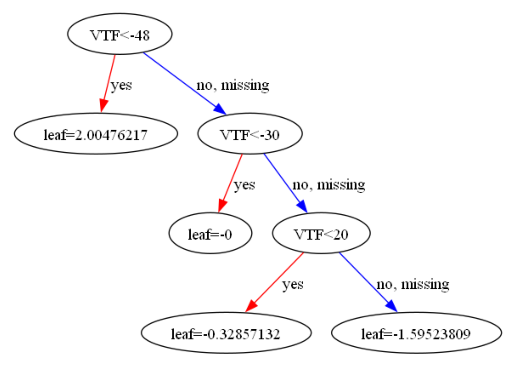

Predicted Final Publish: 29.70328712463379
Best parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.3, 'alpha': 5}


In [38]:
import pandas as pd
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split, RandomizedSearchCV


# Input historical data
data_history = pd.DataFrame({
    "VTF": [-30, 20, -30, 20, -50, -90, -48],
    "Before Publish Actuals": [200, 180, 160, 160, 150, 150, 152],
    "Publish 1": [2, 14, 3, 5, 6, 8, 9],
    "Final Publish": [30, 2, 30, 20, 50, 90, 40],
    "Time" : ["FY23-Q1", "FY23-Q2", "FY23-Q3", "FY23-Q4", "FY24-Q1", "FY24-Q2", "FY24-Q3"]
})

#make time as index
data_history.set_index('Time', inplace=True)


# Plot the data
plt.figure()
plt.plot(data_history.index, data_history['Final Publish'], 'o', color='black')
plt.xlabel('Quarter')
plt.ylabel('Final Publish')
plt.show()

# Data for prediction
data_to_predict = pd.DataFrame({
    "VTF": [-10],
    "Before Publish Actuals": [200],
    "Publish 1": [5]
})

# Define features and labels
X = data_history[["VTF", "Before Publish Actuals", "Publish 1"]]
y = data_history["Final Publish"]

# Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')



# Hyperparameter grid
param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'alpha': [5, 10, 15],
    'n_estimators': [10, 50, 100]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=100, scoring='neg_mean_squared_error', cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X, y)



# Best estimator
best_xgb_model = random_search.best_estimator_
plot_tree(best_xgb_model,num_trees=0, rankdir='TB')
 # `num_trees` is used to specify which tree you want to plot
  # Adjust the figure size as necessary
plt.show()
# Predict the 'Final Publish' for the new data
final_publish_prediction = best_xgb_model.predict(data_to_predict)

# Output the prediction and best parameters
print(f"Predicted Final Publish: {final_publish_prediction[0]}")
print(f"Best parameters: {random_search.best_params_}")

In [25]:
best_xgb_model.n_estimators

100

Predicted Final Publish: 29.70328712463379
Best parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.3, 'alpha': 5}


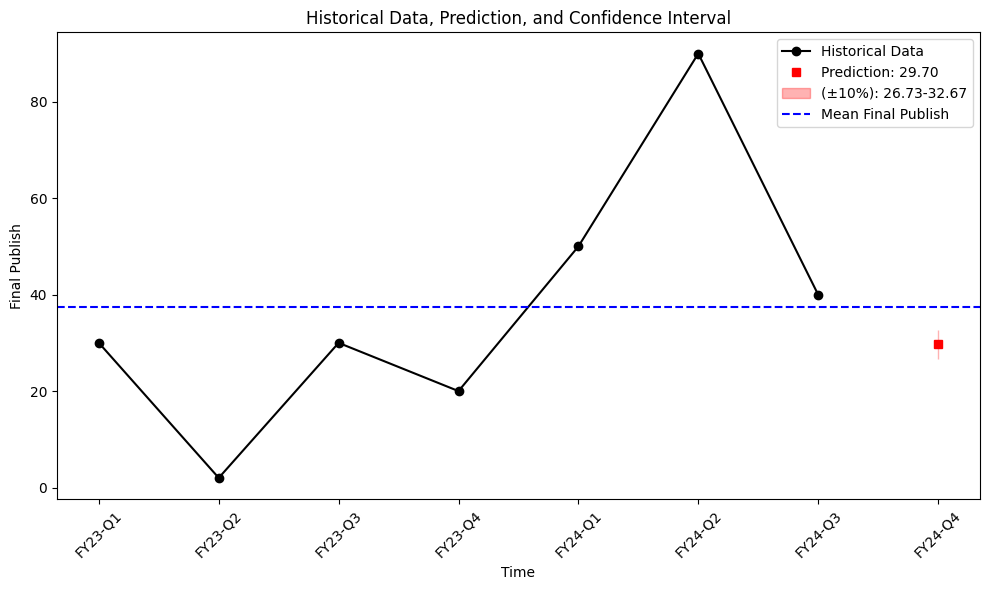

In [42]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

# Your data loading and model training code here

# Best estimator has been found
best_xgb_model = random_search.best_estimator_

# Predict the 'Final Publish' for the new data
final_publish_prediction = best_xgb_model.predict(data_to_predict)

# Print the prediction and best parameters
print(f"Predicted Final Publish: {final_publish_prediction[0]}")
print(f"Best parameters: {random_search.best_params_}")

# Calculate the mean of the 'Final Publish' historical data
mean_final_publish = data_history['Final Publish'].mean()

# Simplified assumption for confidence interval (e.g., ±10% of the prediction)
confidence_interval = [final_publish_prediction[0] * 0.9, final_publish_prediction[0] * 1.1]

# Plotting
plt.figure(figsize=(10, 6))
# Historical data
plt.plot(data_history.index, data_history['Final Publish'], 'o-', color='black', label='Historical Data')
# Prediction
predicted_time = "FY24-Q4"
plt.plot(predicted_time, final_publish_prediction[0], 's', color='red', label=f'Prediction: {final_publish_prediction[0]:.2f} ')
# Confidence interval for the prediction
plt.fill_between([predicted_time], confidence_interval[0], confidence_interval[1], color='red', alpha=0.3, label=f'(±10%): {confidence_interval[0]:.2f}-{confidence_interval[1]:.2f}')
# Mean of 'Final Publish' as a horizontal line
plt.axhline(y=mean_final_publish, color='blue', linestyle='--', label='Mean Final Publish')

#label

# Enhancements
plt.xlabel('Time')
plt.ylabel('Final Publish')
plt.xticks(rotation=45)
plt.title('Historical Data, Prediction, and Confidence Interval')
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
data_history

,VTF,Before Publish Actuals,Publish 1,Final Publish
Time,,,,
FY23-Q1,-30,200,2,30
FY23-Q2,-20,180,14,2
FY23-Q3,-30,160,3,30
FY23-Q4,-20,160,5,20
FY24-Q1,-50,150,6,50
FY24-Q2,-90,150,8,90
FY24-Q3,-48,152,9,40


In [45]:
data_history['Final VTF'] = data_history['VTF'] + data_history['Final Publish']
data_history

,VTF,Before Publish Actuals,Publish 1,Final Publish,Final VTF
Time,,,,,
FY23-Q1,-30,200,2,30,0
FY23-Q2,20,180,14,2,22
FY23-Q3,-30,160,3,30,0
FY23-Q4,20,160,5,20,40
FY24-Q1,-50,150,6,50,0
FY24-Q2,-90,150,8,90,0
FY24-Q3,-48,152,9,40,-8


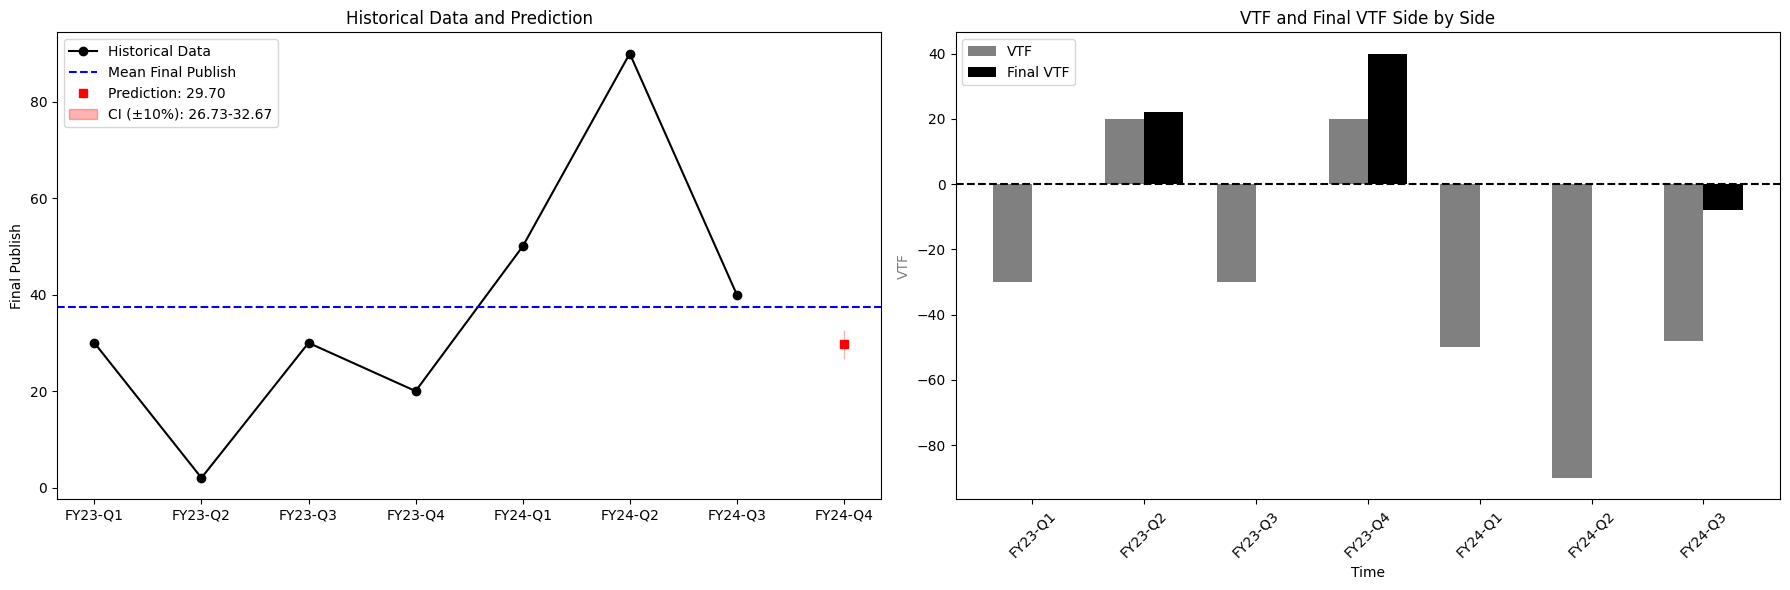

In [50]:
import numpy as np

# Assuming 'Final VTF' is a column in your 'data_history' DataFrame. If not, add it.
# Example: data_history['Final VTF'] = [some_values]

# Create figure and axes objects for side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Change to a 1x2 subplot grid

# Plot 'Final Publish' data on the first subplot (ax1)
ax1.plot(data_history.index, data_history['Final Publish'], 'o-', color='black', label='Historical Data')
ax1.set_ylabel('Final Publish', color='black')
ax1.axhline(y=mean_final_publish, color='blue', linestyle='--', label='Mean Final Publish')
ax1.plot(predicted_time, final_publish_prediction[0], 's', color='red', label=f'Prediction: {final_publish_prediction[0]:.2f}')
ax1.fill_between([predicted_time], confidence_interval[0], confidence_interval[1], color='red', alpha=0.3, label=f'CI (±10%): {confidence_interval[0]:.2f}-{confidence_interval[1]:.2f}')
ax1.legend(loc='upper left')
ax1.set_title('Historical Data and Prediction')

# Define bar width for grouped bars
bar_width = 0.35

# Calculate bar positions for 'VTF' and 'Final VTF'
indices = np.arange(len(data_history.index))
vtf_positions = indices - bar_width/2
final_vtf_positions = indices + bar_width/2

# Plot 'VTF' data as bars on the second subplot (ax2)
ax2.bar(vtf_positions, data_history['VTF'], width=bar_width, color='grey', label='VTF')

# Plot 'Final VTF' data as bars next to 'VTF'
ax2.bar(final_vtf_positions, data_history['Final VTF'], width=bar_width, color='black', label='Final VTF')

ax2.set_ylabel('VTF', color='grey')
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_xlabel('Time')
ax2.set_xticks(indices)
ax2.set_xticklabels(data_history.index)
ax2.legend(loc='upper left')
ax2.set_title('VTF and Final VTF Side by Side')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

# Function to analyze a single product's data
def analyze_product_data(product_data):
    # Convert dictionary to DataFrame
    data_history = pd.DataFrame(product_data)
    
    # Make 'Time' as index
    data_history.set_index('Time', inplace=True)

    # Define features and labels
    X = data_history[["VTF", "Before Publish Actuals", "Publish 1"]]
    y = data_history["Final Publish"]
    
    # Initialize the XGBoost regressor model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

    # Hyperparameter grid
    param_grid = {
        'colsample_bytree': [0.3, 0.7],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'alpha': [5, 10, 15],
        'n_estimators': [10, 50, 100]
    }
    
    # RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=100, scoring='neg_mean_squared_error', cv=3, verbose=1, random_state=42, n_jobs=-1)
    
    # Fit the model
    random_search.fit(X, y)

    # Best estimator
    best_xgb_model = random_search.best_estimator_

    # Plot the historical data
    plt.figure()
    plt.plot(data_history.index, data_history['Final Publish'], 'o-', color='black', label='Historical Data')
    plt.xlabel('Quarter')
    plt.ylabel('Final Publish')
    plt.title('Historical Data')
    plt.legend()
    plt.show()

    # Assuming a static data_to_predict for demonstration; modify as needed
    data_to_predict = pd.DataFrame({
        "VTF": [-10],
        "Before Publish Actuals": [200],
        "Publish 1": [5]
    })
    
    # Predict the 'Final Publish' for the new data
    final_publish_prediction = best_xgb_model.predict(data_to_predict)

    # Output the prediction and best parameters
    print(f"Predicted Final Publish: {final_publish_prediction[0]}")
    print(f"Best parameters: {random_search.best_params_}")

# Example usage with a list of product data dictionaries
list_of_product_data = [
    {
        "VTF": [-30, 20, -30, 20, -50, -90, -48],
        "Before Publish Actuals": [200, 180, 160, 160, 150, 150, 152],
        "Publish 1": [2, 14, 3, 5, 6, 8, 9],
        "Final Publish": [30, 2, 30, 20, 50, 90, 40],
        "Time": ["FY23-Q1", "FY23-Q2", "FY23-Q3", "FY23-Q4", "FY24-Q1", "FY24-Q2", "FY24-Q3"]
    },
    
]

for product_data in list_of_product_data:
    analyze_product_data(product_data)
